In [1]:
import pandas as pd
data=pd.read_csv('final_dummies_training.csv')
data = data.sample(frac = 0.1)
data.drop(['Unnamed: 0','Unnamed: 0.1','review_id','normalized_votes'],inplace=True,axis=1)
#change the following -1 to 0, because multinomial NB only takes non-negative 
#data['Accepts Credit Cards'] = (data['Accepts Credit Cards']+1)/2
#data['Wheelchair Accessible'] = (data['Wheelchair Accessible']+1)/2
data.head(10)


,text,Label,votes_total_user,1.0_Price,2.0_Price,3.0_Price,4.0_Price,0.0_Waiter Service,1.0_Waiter Service,1_open,...,1.0_Noise Level,0.0_Take-out,1.0_Take-out,0.0_Attire,1.0_Attire,1_Ambience_score,2_Ambience_score,3_Ambience_score,4_Ambience_score,6_Ambience_score
874255,I sent my family tonight for dinner. They had ...,1,162,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
101873,"Dinner Review ...\n\nNote about the ""star"" rat...",1,75,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
426019,Awesome place. Staff is super friendly and wel...,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
30045,Ole faithful buffet. Hard to be disappointed ...,1,264,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
359841,"Perhaps my expectations were too great, I\'m s...",1,565,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
733651,"Hands-down, Brio is one of my favorite places ...",1,24,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
83600,Allow time to enjoy the food. This is our 2nd...,1,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
48298,"Love this place! The food is wonderful, very f...",1,25,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
194731,Definitely a weird experience. Sun's in your f...,1,19,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
572539,"Excellent food, professional service, expensiv...",0,28,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [2]:
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

# We will want to keep track of some different roc curves, lets do that here
tprs = []
fprs = []
roc_labels = []



In [3]:
from sklearn.cross_validation import train_test_split

X = data.drop(['Label'],inplace=False,axis=1)
Y = data['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

/Users/muriel820/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## TF-idf n=4

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit a counter
count_vectorizer_tfidf_l1 = TfidfVectorizer(ngram_range = (1,4), min_df = 10, norm = 'l1')
count_vectorizer_tfidf_l1.fit(X_train['text'])

count_vectorizer_tfidf_l2 = TfidfVectorizer(ngram_range = (1,4), min_df = 10, norm = 'l2')
count_vectorizer_tfidf_l2.fit(X_train['text'])


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [5]:
X_train_tfidf_l1 = count_vectorizer_tfidf_l1.transform(X_train['text'])
X_test_tfidf_l1 =  count_vectorizer_tfidf_l1.transform(X_test['text'])

X_train_tfidf_l2 = count_vectorizer_tfidf_l2.transform(X_train['text'])
X_test_tfidf_l2 =  count_vectorizer_tfidf_l2.transform(X_test['text'])


The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


In [6]:
import scipy as sp
X_train_to_merge=sp.sparse.csr_matrix(X_train.drop(['text'],inplace=False,axis=1)) # convert df into sparse matrix
X_test_to_merge=sp.sparse.csr_matrix(X_test.drop(['text'],inplace=False,axis=1))
X_train_sparse_tfidf_l1=sp.sparse.hstack([X_train_tfidf_l1,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l1=sp.sparse.hstack([X_test_tfidf_l1,X_test_to_merge])
X_train_sparse_tfidf_l2=sp.sparse.hstack([X_train_tfidf_l2,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l2=sp.sparse.hstack([X_test_tfidf_l2,X_test_to_merge])


## with Sparse+19 Features with BernoulliNB, MultinomialNB

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l1=MultinomialNB()
MultinomialNBmodel_tfidf_l1.fit(X_train_sparse_tfidf_l1, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l1.predict(X_test_sparse_tfidf_l1),Y_test))

Area under the ROC curve on the test data=0.672


In [8]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l1.predict_proba(X_test_sparse_tfidf_l1)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l1_n=4) - Multinomial NB - features")




In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l2=MultinomialNB()
MultinomialNBmodel_tfidf_l2.fit(X_train_sparse_tfidf_l2, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l2.predict(X_test_sparse_tfidf_l2),Y_test))

Area under the ROC curve on the test data=0.670


In [10]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l2.predict_proba(X_test_sparse_tfidf_l2)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l2_n=4) - Multinomial NB - features")



## TF-idf n=3

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit a counter
count_vectorizer_tfidf_l1 = TfidfVectorizer(ngram_range = (1,3), min_df = 10, norm = 'l1')
count_vectorizer_tfidf_l1.fit(X_train['text'])

count_vectorizer_tfidf_l2 = TfidfVectorizer(ngram_range = (1,3), min_df = 10, norm = 'l2')
count_vectorizer_tfidf_l2.fit(X_train['text'])


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [12]:
X_train_tfidf_l1 = count_vectorizer_tfidf_l1.transform(X_train['text'])
X_test_tfidf_l1 =  count_vectorizer_tfidf_l1.transform(X_test['text'])

X_train_tfidf_l2 = count_vectorizer_tfidf_l2.transform(X_train['text'])
X_test_tfidf_l2 =  count_vectorizer_tfidf_l2.transform(X_test['text'])


In [13]:
import scipy as sp
X_train_to_merge=sp.sparse.csr_matrix(X_train.drop(['text'],inplace=False,axis=1)) # convert df into sparse matrix
X_test_to_merge=sp.sparse.csr_matrix(X_test.drop(['text'],inplace=False,axis=1))
X_train_sparse_tfidf_l1=sp.sparse.hstack([X_train_tfidf_l1,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l1=sp.sparse.hstack([X_test_tfidf_l1,X_test_to_merge])
X_train_sparse_tfidf_l2=sp.sparse.hstack([X_train_tfidf_l2,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l2=sp.sparse.hstack([X_test_tfidf_l2,X_test_to_merge])


## with Sparse+19 Features with BernoulliNB, MultinomialNB

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l1=MultinomialNB()
MultinomialNBmodel_tfidf_l1.fit(X_train_sparse_tfidf_l1, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l1.predict(X_test_sparse_tfidf_l1),Y_test))

Area under the ROC curve on the test data=0.673


In [15]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l1.predict_proba(X_test_sparse_tfidf_l1)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l1_n=3) - Multinomial NB - features")




In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l2=MultinomialNB()
MultinomialNBmodel_tfidf_l2.fit(X_train_sparse_tfidf_l2, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l2.predict(X_test_sparse_tfidf_l2),Y_test))

Area under the ROC curve on the test data=0.669


In [17]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l2.predict_proba(X_test_sparse_tfidf_l2)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l2_n=3) - Multinomial NB - features")



## TF-idf n=2

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit a counter
count_vectorizer_tfidf_l1 = TfidfVectorizer(ngram_range = (1,2), min_df = 10, norm = 'l1')
count_vectorizer_tfidf_l1.fit(X_train['text'])

count_vectorizer_tfidf_l2 = TfidfVectorizer(ngram_range = (1,2), min_df = 10, norm = 'l2')
count_vectorizer_tfidf_l2.fit(X_train['text'])


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [19]:
X_train_tfidf_l1 = count_vectorizer_tfidf_l1.transform(X_train['text'])
X_test_tfidf_l1 =  count_vectorizer_tfidf_l1.transform(X_test['text'])

X_train_tfidf_l2 = count_vectorizer_tfidf_l2.transform(X_train['text'])
X_test_tfidf_l2 =  count_vectorizer_tfidf_l2.transform(X_test['text'])


In [20]:
import scipy as sp
X_train_to_merge=sp.sparse.csr_matrix(X_train.drop(['text'],inplace=False,axis=1)) # convert df into sparse matrix
X_test_to_merge=sp.sparse.csr_matrix(X_test.drop(['text'],inplace=False,axis=1))
X_train_sparse_tfidf_l1=sp.sparse.hstack([X_train_tfidf_l1,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l1=sp.sparse.hstack([X_test_tfidf_l1,X_test_to_merge])
X_train_sparse_tfidf_l2=sp.sparse.hstack([X_train_tfidf_l2,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l2=sp.sparse.hstack([X_test_tfidf_l2,X_test_to_merge])


## with Sparse+19 Features with BernoulliNB, MultinomialNB

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l1=MultinomialNB()
MultinomialNBmodel_tfidf_l1.fit(X_train_sparse_tfidf_l1, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l1.predict(X_test_sparse_tfidf_l1),Y_test))

Area under the ROC curve on the test data=0.674


In [22]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l1.predict_proba(X_test_sparse_tfidf_l1)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l1_n=2) - Multinomial NB - features")




In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l2=MultinomialNB()
MultinomialNBmodel_tfidf_l2.fit(X_train_sparse_tfidf_l2, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l2.predict(X_test_sparse_tfidf_l2),Y_test))

Area under the ROC curve on the test data=0.671


In [24]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l2.predict_proba(X_test_sparse_tfidf_l2)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l2_n=2) - Multinomial NB - features")



## TF-idf n=1

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit a counter
count_vectorizer_tfidf_l1 = TfidfVectorizer( min_df = 10, norm = 'l1')
count_vectorizer_tfidf_l1.fit(X_train['text'])

count_vectorizer_tfidf_l2 = TfidfVectorizer( min_df = 10, norm = 'l2')
count_vectorizer_tfidf_l2.fit(X_train['text'])


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [26]:
X_train_tfidf_l1 = count_vectorizer_tfidf_l1.transform(X_train['text'])
X_test_tfidf_l1 =  count_vectorizer_tfidf_l1.transform(X_test['text'])

X_train_tfidf_l2 = count_vectorizer_tfidf_l2.transform(X_train['text'])
X_test_tfidf_l2 =  count_vectorizer_tfidf_l2.transform(X_test['text'])


In [27]:
import scipy as sp
X_train_to_merge=sp.sparse.csr_matrix(X_train.drop(['text'],inplace=False,axis=1)) # convert df into sparse matrix
X_test_to_merge=sp.sparse.csr_matrix(X_test.drop(['text'],inplace=False,axis=1))
X_train_sparse_tfidf_l1=sp.sparse.hstack([X_train_tfidf_l1,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l1=sp.sparse.hstack([X_test_tfidf_l1,X_test_to_merge])
X_train_sparse_tfidf_l2=sp.sparse.hstack([X_train_tfidf_l2,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l2=sp.sparse.hstack([X_test_tfidf_l2,X_test_to_merge])


## with Sparse+19 Features with BernoulliNB, MultinomialNB

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l1=MultinomialNB()
MultinomialNBmodel_tfidf_l1.fit(X_train_sparse_tfidf_l1, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l1.predict(X_test_sparse_tfidf_l1),Y_test))

Area under the ROC curve on the test data=0.677


In [29]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l1.predict_proba(X_test_sparse_tfidf_l1)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l1_n=1) - Multinomial NB - features")




In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l2=MultinomialNB()
MultinomialNBmodel_tfidf_l2.fit(X_train_sparse_tfidf_l2, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l2.predict(X_test_sparse_tfidf_l2),Y_test))

Area under the ROC curve on the test data=0.674


In [31]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l2.predict_proba(X_test_sparse_tfidf_l2)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l2_n=1) - Multinomial NB - features")



In [32]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn import metrics

#GaussianNBmodel=GaussianNB()
#GaussianNBmodel.fit(X_train_to_array, Y_train)

In [33]:
#from sklearn import metrics
#tmp_X_test = X_test_sparse.toarray()
#print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(GaussianNBmodel.predict(tmp_X_test),Y_test))

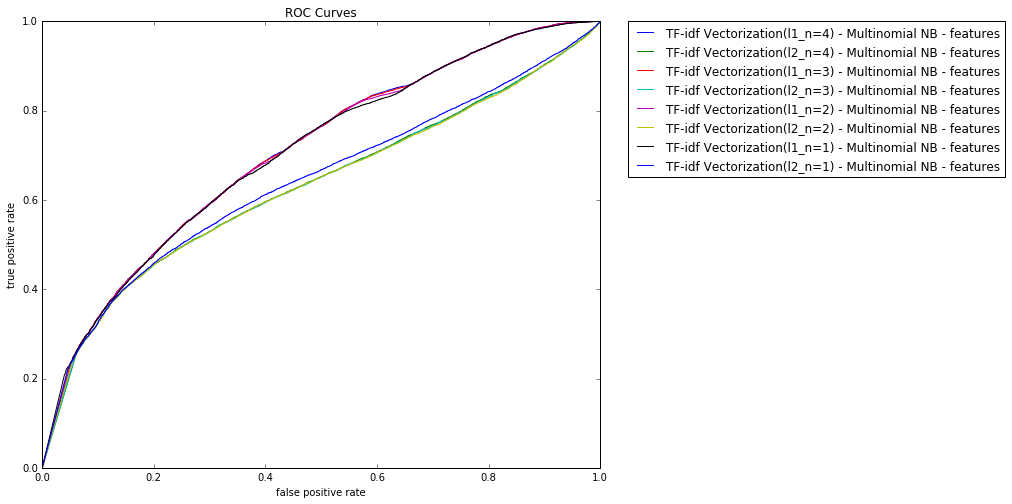

In [34]:
for fpr, tpr, roc_label in zip(fprs, tprs, roc_labels):
    plt.plot(fpr, tpr, label=roc_label)

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curves")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()